In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def alpha_bar(x):
    return 1/8*(x + 1)**2

def eigen_generator(n):  # generates eigen values, returns float
    # n >= 1
    return 1 / ((n-0.5)**2 * np.pi**2)

def eigen_func(x, lambda_n):  # generates the eigen functions evaluated at an x_array, returns array
    # n >= 1
    return np.sqrt(2)*np.sin(x / np.sqrt(lambda_n))

eigen_func = np.vectorize(eigen_func)
alpha_bar = np.vectorize(alpha_bar)

def karhunen_loueve(eigen_values, eigen_function_values):  # sums eigen functions and eigen values, returns array
    n = len(eigen_values)  # number of terms to add
    sum = 0
    
    for i in range(n):
        sum += np.sqrt(eigen_values[i]) * eigen_function_values[:,i] * np.random.normal()
        
    return sum
        
def variance_calculator(eigen_values, x):  # calcualtes variance at a specific x lcoation, returns float
    sum = 0
    n = len(eigen_values)
    for i in range(n):
        sum += eigen_values[i]* eigen_func(x, eigen_values[i])**2
      
    return sum
    

In [3]:
first_3_eigens  = eigen_generator(np.arange(1,3+1))

x_domain = np.linspace(0,1,201)
y_values = np.zeros((201, 3))   # rows are location, columns are eigen function number

for i in range(3):  # generate the eigenfunctions from [0, 1] 
    y_values[:,i] = eigen_func(x_domain, first_3_eigens[i])
    
mean_alpha = alpha_bar(x_domain)


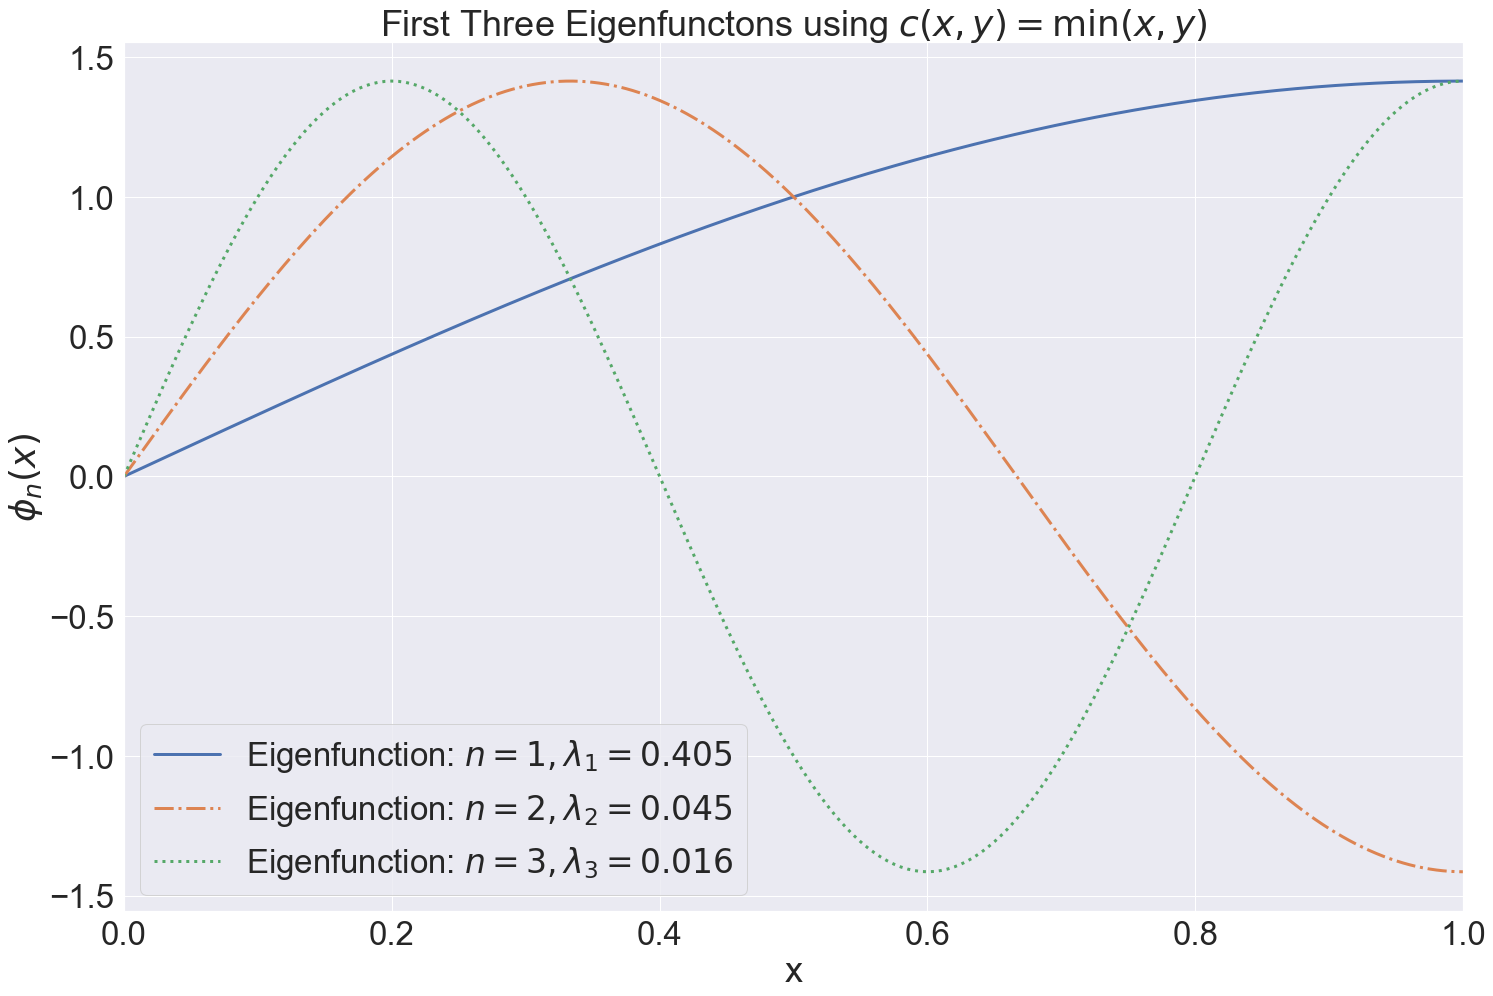

In [4]:
sns.set(font_scale=3)
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))

linestyles =['-','-.', ':' ]

for i in range(3):
    plt.plot(x_domain, y_values[:,i], ls=linestyles[i],linewidth=3,label=r'Eigenfunction: $ n={},\lambda_{{{}}}= {{{:0.3f}}}$'.format(i+1,i+1,first_3_eigens[i]))
plt.legend()
ax.set_xlim((0,1))
ax.set_xlabel('x')
ax.set_ylabel(r'$\phi_n(x)$')

plt.title(r'First Three Eigenfunctons using $c(x,y)= {\mathrm{min}}(x,y)$');


In [5]:

realizations = 1000

realization_array = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array[i,:]=mean_alpha + karhunen_loueve(first_3_eigens, y_values)
    

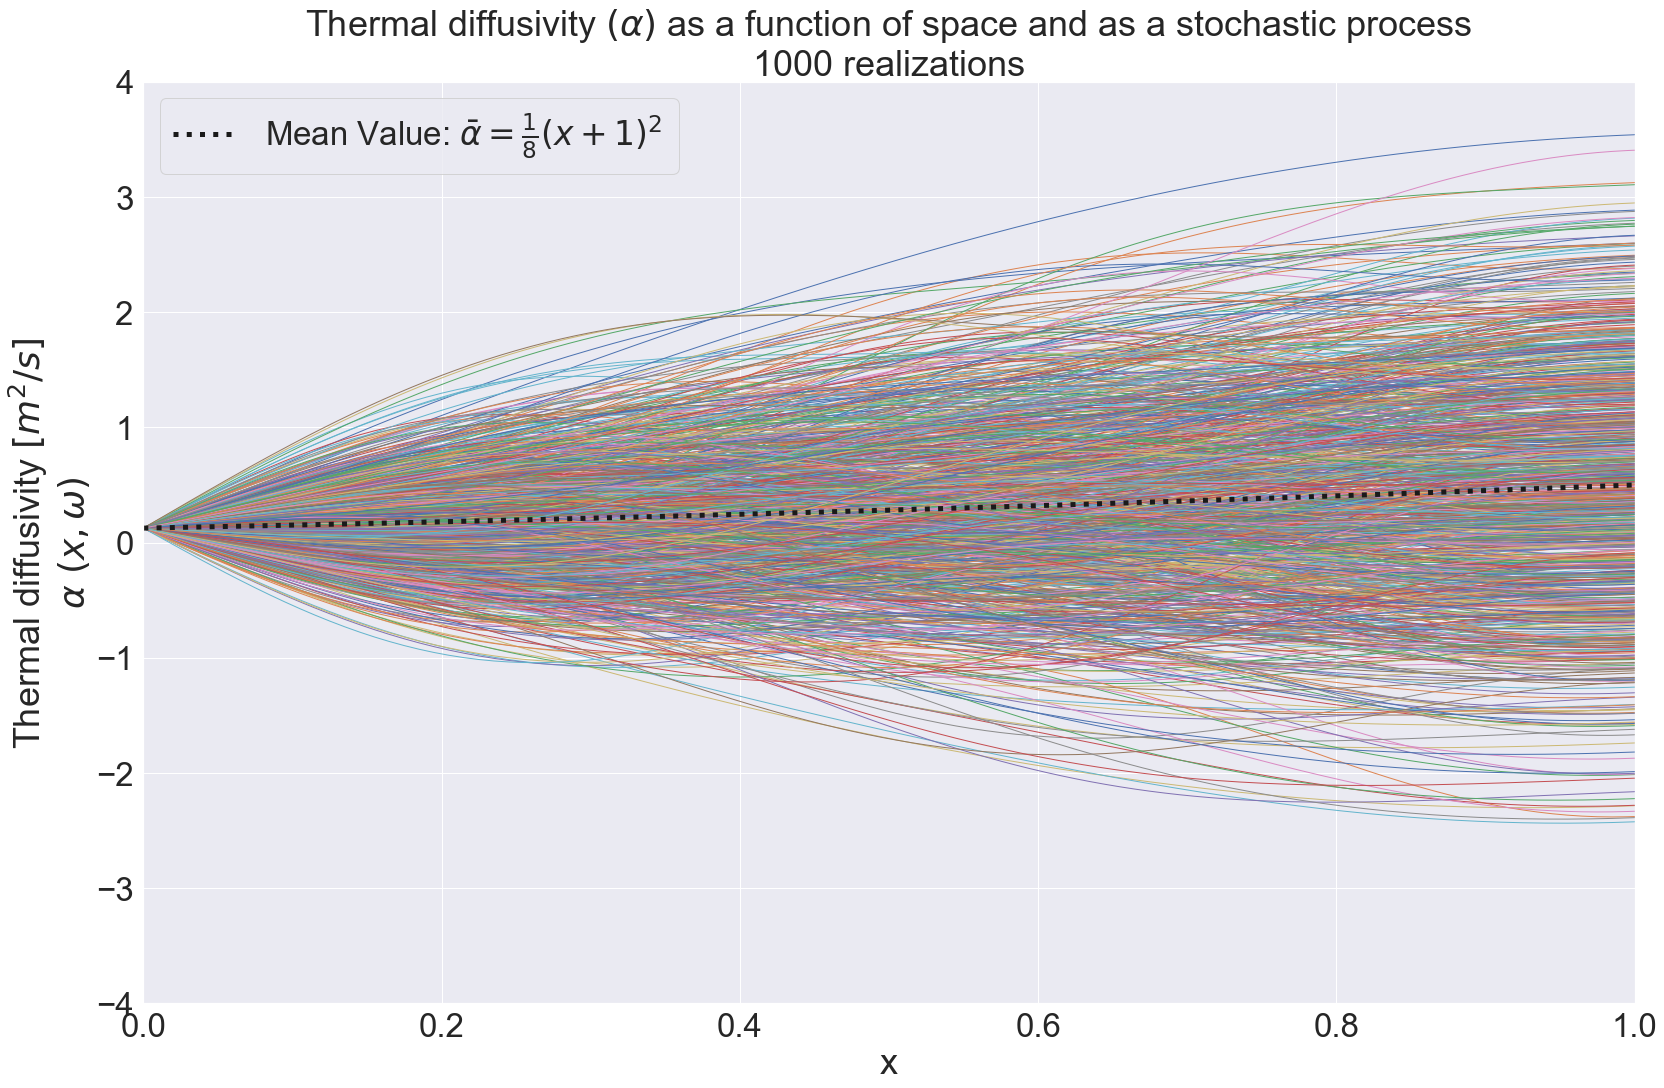

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
ax.set_ylim(-4,4)
ax.set_xlim(0,1)
for i in range(realizations):
    plt.plot(x_domain,realization_array[i,:], linewidth=1)
    
plt.plot(x_domain, mean_alpha, linewidth=5, ls=':', c='k', label=r'Mean Value: $\bar{\alpha}=\frac{1}{8}(x+1)^2$ ')    
ax.set_xlabel('x')
ax.set_ylabel('Thermal diffusivity ' + r'$ [m^2/s]$' +'\n' + r'$\alpha \ (x,\omega)$');
ax.set_title(r'Thermal diffusivity $(\alpha)$ as a function of space and as a stochastic process' + f'\n{realizations} realizations');
plt.legend(loc=2);
fig.tight_layout()
plt.savefig('realizations_of_diffusivity')

###  <center> KDE, Normalized  Histogram, and Normal Approximation at $x$ <center/>
###  <center>  $\beta \ (\bar{x}, \omega) = \sum_{i=1}^{3} \sqrt{\lambda_n} \phi_n({\bar{x}})Q_n(\omega) \ |_{\ \bar{x}=0.5}$ <center/>
    
### $$\mathrm{var} \left(\sum_{i=1}^{n} a_iX_i\right) =\sum_{i=1}^{n} a_{i}^2 \mathrm{var}(X_i) $$
    
## $$\rightarrow \mathrm{var}(\beta \ (0.5, \omega)) =  \sum_{i=1}^{3} {\lambda_n} \phi_n({0.5})^2  \ \mathrm{var} \left(Q_n(\omega) \right) =  \sum_{i=1}^{3} {\lambda_n} \phi_n({0.5})^2  $$

## <center> Using: $Q_n(\omega) \sim \mathcal{N}(\mu =0, \sigma^2=1)$ <center/>

In [7]:
var_with_3_eigens = variance_calculator(first_3_eigens, 0.5)
sd_with_3_eigns = np.sqrt(var_with_3_eigens)

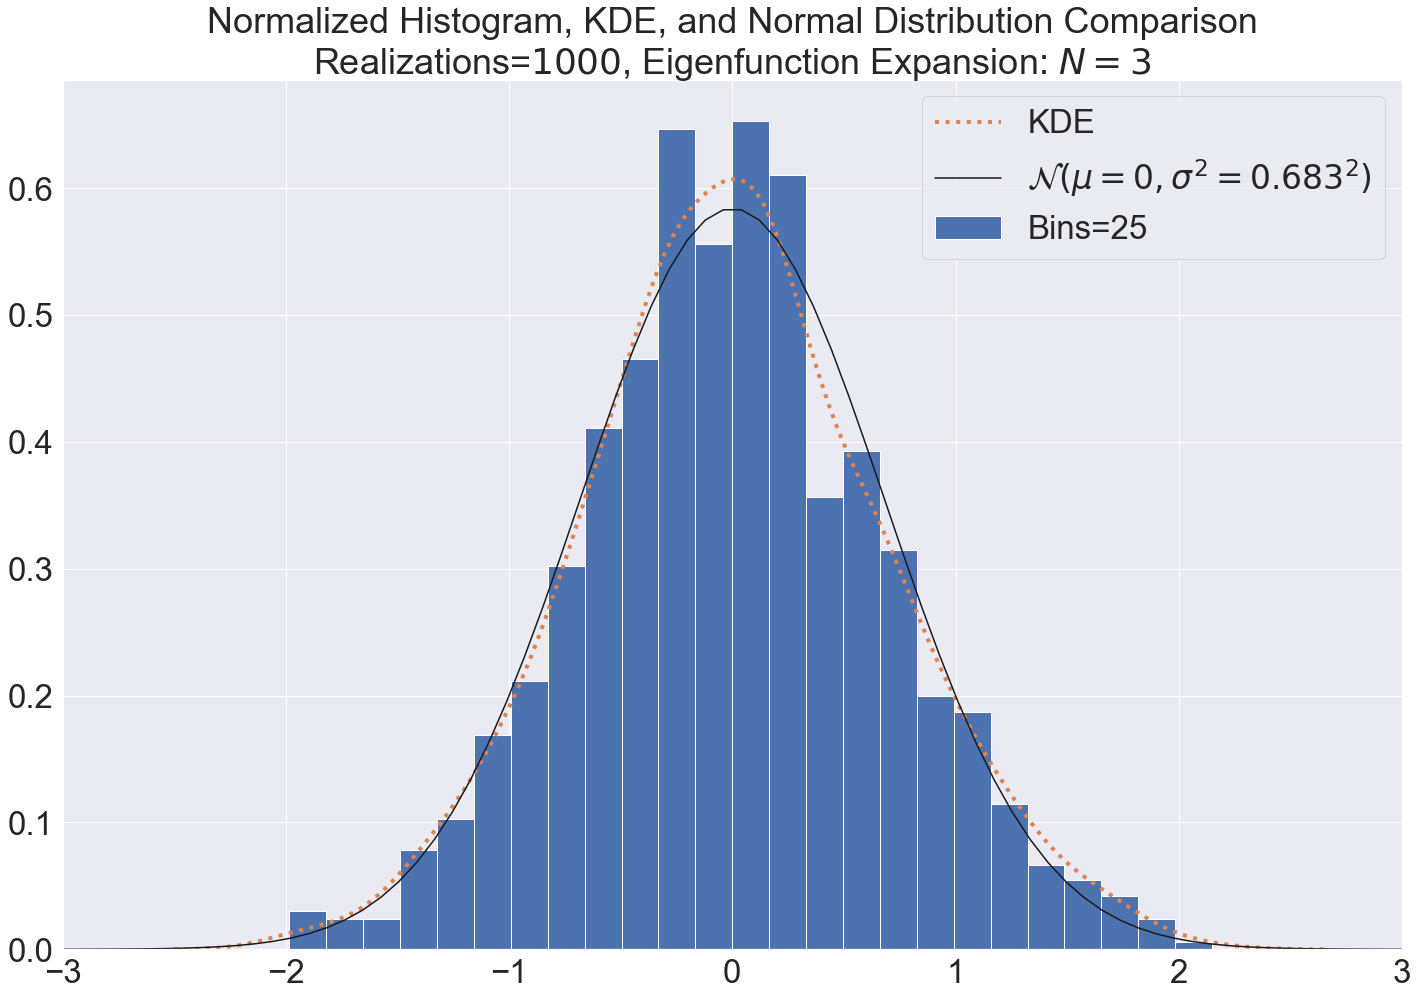

In [8]:
beta_half_point = realization_array[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

gaussian_range = np.linspace(-4,4,100)
gaussian_pdf_3_eigens = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd_with_3_eigns)
bin_count = 25

fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf_3_eigens, label=r'$\mathcal{{N}}(\mu =0, \sigma^2={{{0:0.3f}}}^2)$'.format(sd_with_3_eigns), c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 3$'.format(realizations))
plt.legend();

In [9]:
first_6_eigens  = eigen_generator(np.arange(1,6+1))

y_values_6 = np.zeros((201, 6))

for i in range(6):  # generate the eigenfunctions from [0, 1] 
    y_values_6[:,i] = eigen_func(x_domain, first_6_eigens[i])

realization_array_6 = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_array_6[i,:]=mean_alpha + karhunen_loueve(first_6_eigens, y_values_6)    
    
beta_half_point_6 = realization_array_6[:,100] - alpha_bar(0.5)   # Expansion - mean of alpha

var_with_6_eigens = variance_calculator(first_6_eigens, 0.5)
sd_with_6_eigns = np.sqrt(var_with_6_eigens)

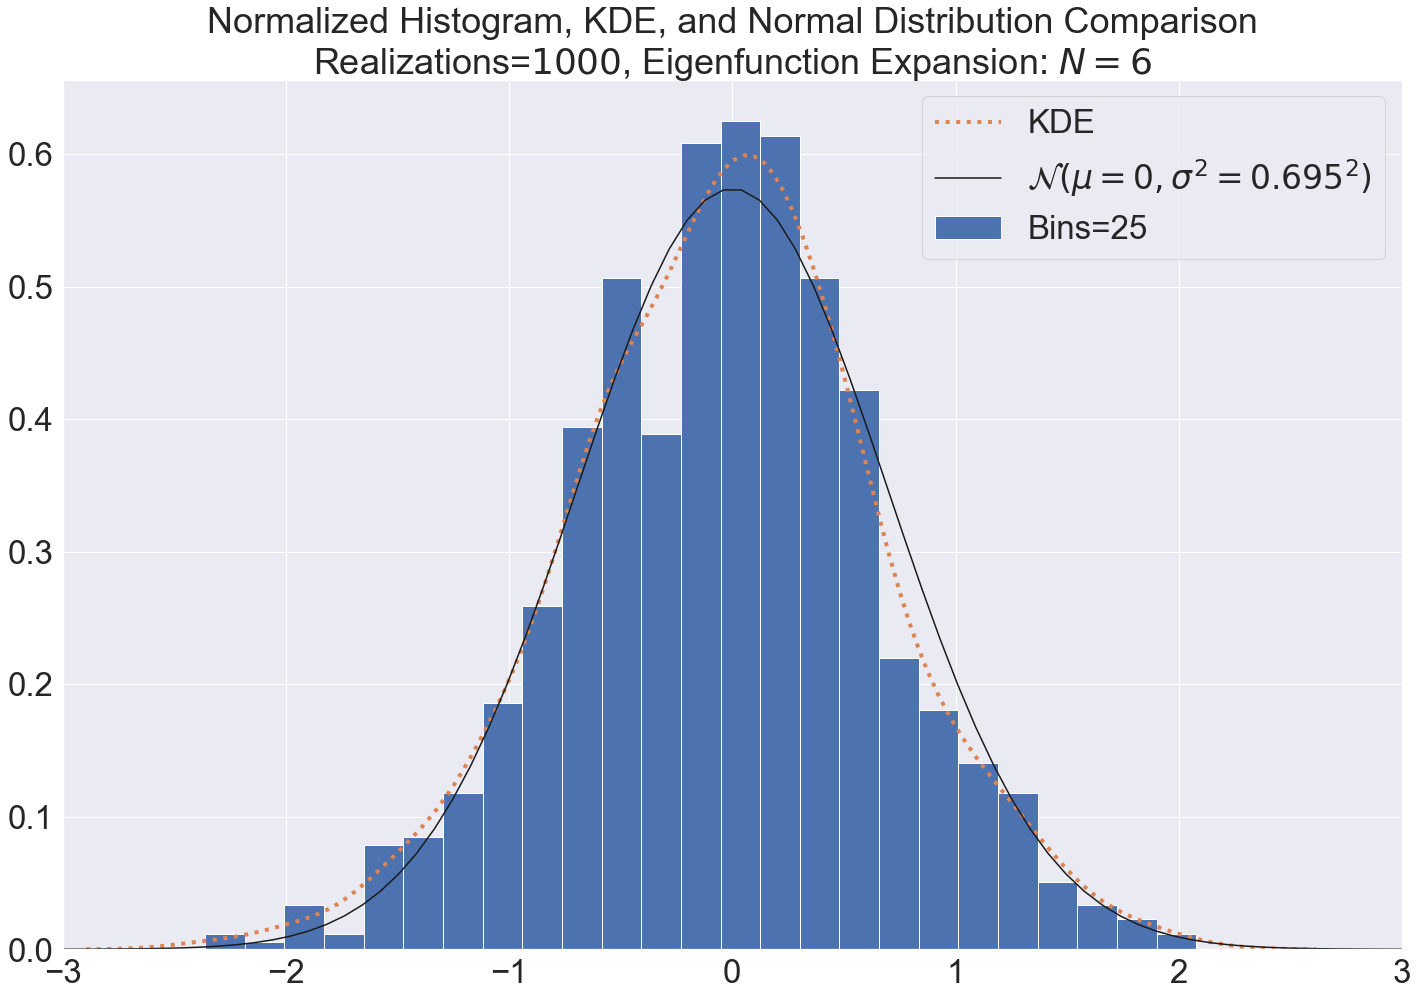

In [10]:
gaussian_pdf_6_eigens = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd_with_6_eigns)
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
(bin_values, _, _) = plt.hist(beta_half_point_6, bins=bin_count, stacked=True, density=True,
                              label=f'Bins={bin_count}')  # plot Normalized Histogram
sns.kdeplot(beta_half_point_6, label='KDE', linestyle=':', linewidth=4)  # plot KDE  of sample distribution
plt.plot(gaussian_range, gaussian_pdf_6_eigens, label=r'$\mathcal{{N}}(\mu =0, \sigma^2={{{0:0.3f}}}^2)$'.format(sd_with_6_eigns), c='k')

ax.set_xlim(-3,3)
plt.title('Normalized Histogram, KDE, and Normal Distribution Comparison\n' + r'Realizations=${{{}}}$, Eigenfunction Expansion: $N= 6$'.format(realizations))
plt.legend();

#### <center> Now consider the exponential covariance function <center/>

In [11]:
L = 5

def transcend_eq_2(w):
    # for even n
    return L*w + np.tan(w) 

def transcend_eq_1(v):
    # for odd n, n starts at 1
    return 1-L*v*np.tan(v) 

def eigen_func_exp_generator(root_n):
    return 2*L / (1 + L**2 * root_n**2)

def phi_2(x, root_n):
    return np.sin(root_n*x) / np.sqrt(1 - (np.sin(2*root_n) / 2*root_n))  # (1, len(x)) 


def phi_1(x, root_n):
    return np.cos(root_n*x) / np.sqrt(1 + (np.sin(2*root_n) / 2*root_n))

def eigen_func_expkern(x, num_odd_even, roots_1, roots_2):  # generates the eigen functions from exponential kernel evaluated at an x_array, returns array
    # pass only the size of the roots that need to be used
    # n >= 1

    
    n = num_odd_even
    phi_solutions = np.zeros((num_odd_even*2, x.shape[0]))
    
    for i in range(n):
            phi_solutions[(2*i), :] = phi_1(x, roots_1[i])
            phi_solutions[(2*i+1), :] = phi_2(x, roots_2[i])
            

    return phi_solutions
  


In [12]:
x_domain = np.linspace(-1,1,201)
x_search = np.arange(0, 100, 0.1)
unique_roots_eq_1 = {0}
unique_roots_eq_2 = {0}

for i in range(x_search.shape[0]):
    unique_roots_eq_1.add(round(scipy.optimize.fsolve(transcend_eq_1, x_search[i])[0],5))
    unique_roots_eq_2.add(round(scipy.optimize.fsolve(transcend_eq_2, x_search[i])[0],5))
                     
unique_roots_eq_1, unique_roots_eq_2 = np.array(list(unique_roots_eq_1)), np.array(list(unique_roots_eq_2))
unique_roots_eq_1, unique_roots_eq_2 = unique_roots_eq_1[unique_roots_eq_1 > 0], unique_roots_eq_2[unique_roots_eq_2 > 0]
first2_unique_roots =[unique_roots_eq_1[0], unique_roots_eq_2[0]]
first2_unique_roots

[0.43284, 1.68868]

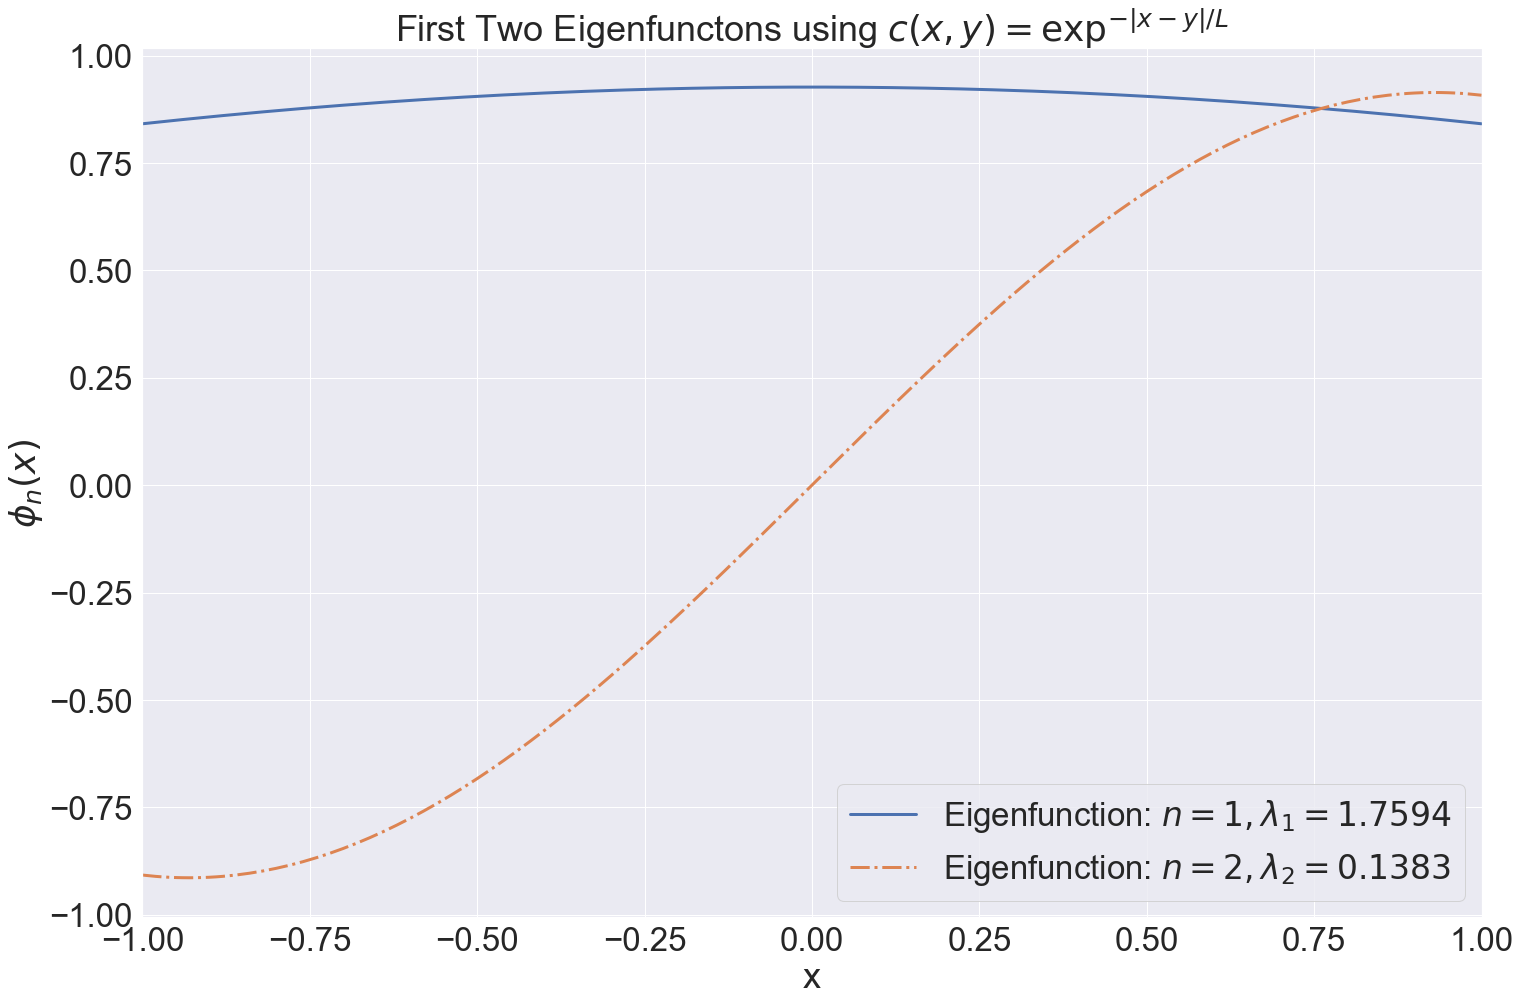

In [13]:
exp_basis_eigen_results = eigen_func_expkern(x_domain, 1, unique_roots_eq_1, unique_roots_eq_2)
exp_basis_solutions = np.transpose(exp_basis_eigen_results)  # tranpose to use Karhunen function

my_exp_eigens= [eigen_func_exp_generator(root) for root in first2_unique_roots]

fig, ax = plt.subplots(ncols=1, figsize=(24, 16))

linestyles =['-','-.', ':' ]

for i in range(2):
    plt.plot(x_domain, exp_basis_solutions[:,i], ls=linestyles[i],linewidth=3,label=r'Eigenfunction: $ n={},\lambda_{{{}}}= {{{:0.4f}}}$'.format(i+1,i+1,my_exp_eigens[i]))
plt.legend()
ax.set_xlim((-1,1))
ax.set_xlabel('x')
ax.set_ylabel(r'$\phi_n(x)$')

plt.title(r'First Two Eigenfunctons using $c(x,y)= {\exp^{-|x-y| / L}}$');


In [14]:
realization_exp = np.zeros((realizations, x_domain.shape[0]))

for i in range(realizations):
    realization_exp[i,:]=mean_alpha + karhunen_loueve(my_exp_eigens, exp_basis_solutions)    
    

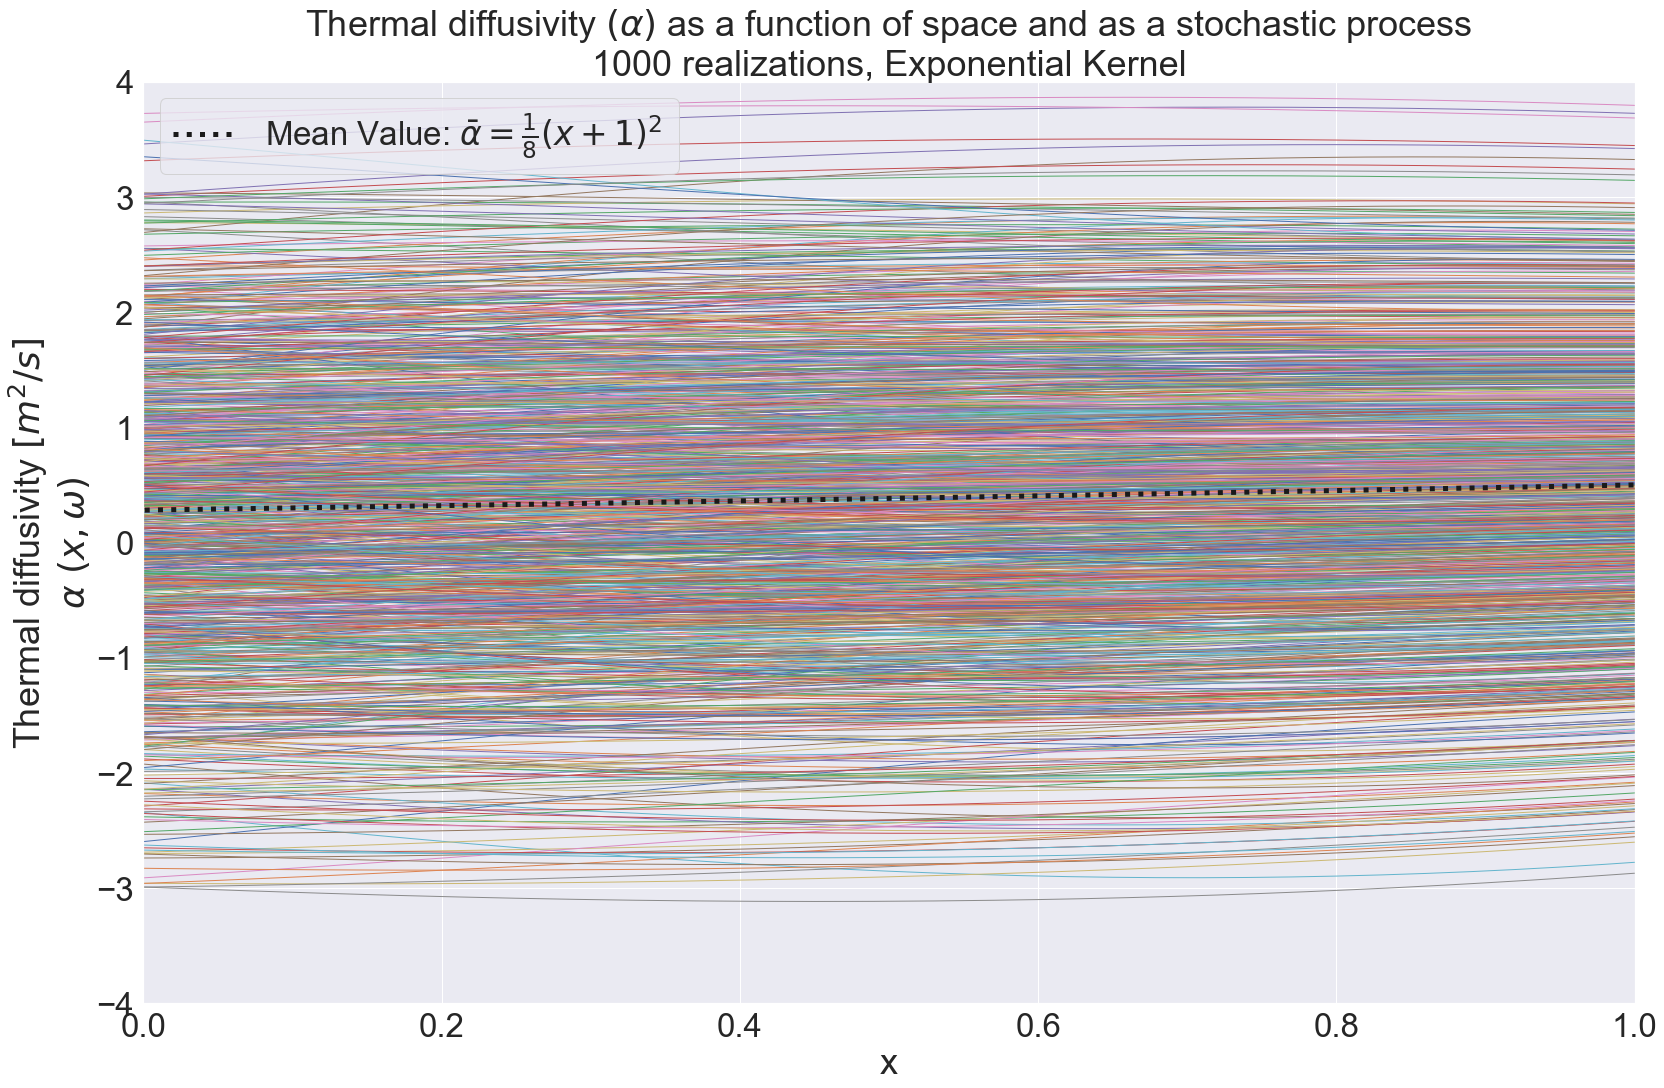

In [15]:
fig, ax = plt.subplots(ncols=1, figsize=(24, 16))
ax.set_ylim(-4,4)
ax.set_xlim(0,1)
for i in range(realizations):
    plt.plot(x_domain,realization_exp[i,:], linewidth=1)
    
plt.plot(x_domain, mean_alpha, linewidth=5, ls=':', c='k', label=r'Mean Value: $\bar{\alpha}=\frac{1}{8}(x+1)^2$ ')    
ax.set_xlabel('x')
ax.set_ylabel('Thermal diffusivity ' + r'$ [m^2/s]$' +'\n' + r'$\alpha \ (x,\omega)$');
ax.set_title(r'Thermal diffusivity $(\alpha)$ as a function of space and as a stochastic process' + f'\n{realizations} realizations, Exponential Kernel');
plt.legend(loc=2);
fig.tight_layout()
plt.savefig('realizations_of_diffusivity_exp')

In [16]:
import pandas as pd

def func_3(q, x):
    return q[0] + q[1]*x + q[2]*x**2

def solve_me(data_frame,lambda_array):
    alpha_data = alpha_bar(data_frame.x)
    
    for lambdas in 
    eigen_data = [eigen_func(data_frame.x,eigen_n) for eigen_n in lambda_array]


In [68]:
df = pd.read_csv('KL_data.txt', header=None,delim_whitespace=True)
df.columns = ['x', 'y']

eigen_func(df.x, first_3_eigens[0])


[array([0.        , 0.11095792, 0.22123174, 0.3301416 , 0.43701602,
        0.5411961 , 0.64203952, 0.73892456, 0.83125388, 0.91845824,
        1.        , 1.07537643, 1.14412281, 1.20581528, 1.26007351,
        1.30656296, 1.34499702, 1.37513873, 1.39680225, 1.40985401,
        1.41421356]),
 array([ 0.        ,  0.3301416 ,  0.64203952,  0.91845824,  1.14412281,
         1.30656296,  1.39680225,  1.40985401,  1.34499702,  1.20581528,
         1.        ,  0.73892456,  0.43701602,  0.11095792, -0.22123174,
        -0.5411961 , -0.83125388, -1.07537643, -1.26007351, -1.37513873,
        -1.41421356]),
 array([ 0.00000000e+00,  5.41196100e-01,  1.00000000e+00,  1.30656296e+00,
         1.41421356e+00,  1.30656296e+00,  1.00000000e+00,  5.41196100e-01,
        -4.54845772e-16, -5.41196100e-01, -1.00000000e+00, -1.30656296e+00,
        -1.41421356e+00, -1.30656296e+00, -1.00000000e+00, -5.41196100e-01,
         9.09691544e-16,  5.41196100e-01,  1.00000000e+00,  1.30656296e+00,
         1.